In [1]:
import pandas as pd
import json
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from imblearn.metrics import geometric_mean_score
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn import tree

In [2]:
df_trending = pd.read_csv('df_trending.csv')

In [3]:
df_non_trending = pd.read_csv('df_non_trending.csv')

<font size="5"><b>Aktualnie posiadane dane</b></font>

In [4]:
df_trending = df_trending.iloc[:12500]

In [5]:
df_trending.head()

publishedAt_hour  title_len  title_capitalised  title_punctuation  \
0                19         34               True               True   
1                17         60              False               True   
2                16         53              False               True   
3                16         56              False               True   
4                15         55              False               True   

   description_capitalised  description_punctuation  description_len  \
0                    False                     True              362   
1                    False                     True              716   
2                    False                     True              514   
3                    False                     True              763   
4                    False                     True             2494   

                                       filtered_tags  tags_len  trending_days  \
0  {'prank', 'funny', 'brother', 'mama', 'ghost',...        18              7   
1  {'fun', 'titanfall', 'origin', 'royale', 'mult...        27              5   
2  {'compilation', 'dank', 'fan', 'memes', 'jacks...        23              7   
3  {'rapper', 'hip', 'keem', 'xxl', 'rap', 'wave'...        28              5   
4  {'movie', 'theater', 'savannah', 'makeover', '...        38              6   

   ...  Intensity                                            objects  Emotion  \
0  ...  506510550                               ['person', 'person']    happy   
1  ...  199825645                                                 []  neutral   
2  ...  303325705                        ['person', 'tie', 'banana']    angry   
3  ...  348247070  ['train', 'stop sign', 'person', 'person', 'pe...    happy   
4  ...  359889150  ['person', 'person', 'person', 'person', 'pers...     fear   

    Age  Gender             Race person_count org_categories  ground_truth  \
0  31.0     Man  latino hispanic            2            NaN          22.0   
1  34.0     Man            white            0           20.0          20.0   
2  37.0     Man   middle eastern            1            NaN          24.0   
3  22.0     Man            black            5            NaN          10.0   
4  25.0     Man            white            7            NaN          26.0   

         cat_name  
0  People & Blogs  
1          Gaming  
2   Entertainment  
3           Music  
4   Howto & Style  

[5 rows x 25 columns]

In [6]:
df_trending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12500 entries, 0 to 12499
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   publishedAt_hour         12500 non-null  int64  
 1   title_len                12500 non-null  int64  
 2   title_capitalised        12500 non-null  bool   
 3   title_punctuation        12500 non-null  bool   
 4   description_capitalised  12500 non-null  bool   
 5   description_punctuation  12500 non-null  bool   
 6   description_len          12500 non-null  int64  
 7   filtered_tags            12500 non-null  object 
 8   tags_len                 12500 non-null  int64  
 9   trending_days            12500 non-null  int64  
 10  tags_based_category      12500 non-null  object 
 11  entropy                  12500 non-null  float64
 12  Red                      12500 non-null  int64  
 13  Green                    12500 non-null  int64  
 14  Blue                  

In [7]:
df_trending.columns

Index(['publishedAt_hour', 'title_len', 'title_capitalised',
       'title_punctuation', 'description_capitalised',
       'description_punctuation', 'description_len', 'filtered_tags',
       'tags_len', 'trending_days', 'tags_based_category', 'entropy', 'Red',
       'Green', 'Blue', 'Intensity', 'objects', 'Emotion', 'Age', 'Gender',
       'Race', 'person_count', 'org_categories', 'ground_truth', 'cat_name'],
      dtype='object')

In [8]:
df_non_trending.head()

video_id                                              title  \
0  deMLg4FPFhQ     Rod Wave - Heart On Ice (Official Music Video)   
1  TwTopnGgkQE                           BACKYARD RAFTING FAILS!!   
2  CC4v6aJ48v4               I Surprised ZHC With A Custom Tesla!   
3  FoOnS_z8xhI       Fighting a 1000+lb Monster Sawfish for Hours   
4  amWNMjJIyro  Drake - Laugh Now Cry Later (Official Music Vi...   

                 publishedAt  categoryId  \
0  2019-05-23 03:59:02+00:00          10   
1  2017-09-21 19:13:13+00:00          22   
2  2022-01-30 15:00:07+00:00          24   
3  2018-10-23 22:00:00+00:00          17   
4  2020-08-14 05:15:02+00:00          24   

                                                tags  \
0  ['rod wave', 'rod', 'wave', 'hunger games', 'h...   
1  ['Roman Atwood', 'Roman', 'Atwood', 'roman atw...   
2  ['funny', 'comedy', 'challenge', 'family', 'br...   
3  ['Fighting', 'Fishing', 'Monster', 'Sawfish', ...   
4  ['Nolifeshaq reactions', 'hip hop reactions', ...   

                                      thumbnail_link  \
0  https://i.ytimg.com/vi/deMLg4FPFhQ/maxresdefau...   
1  https://i.ytimg.com/vi/TwTopnGgkQE/maxresdefau...   
2  https://i.ytimg.com/vi/CC4v6aJ48v4/maxresdefau...   
3  https://i.ytimg.com/vi/FoOnS_z8xhI/maxresdefau...   
4  https://i.ytimg.com/vi/amWNMjJIyro/maxresdefau...   

                                         description  publishedAt_hour  \
0  Stream "Pray 4 Love" 🖤album - http://smarturl....                 3   
1  BACKYARD RAFTING FAILS!!| Subscribe: http://bi...                19   
2  I Surprised ZHC With A Custom Tesla! with Bria...                15   
3  My buddy Max and I went fishing for tarpon, sn...                22   
4  #Drake #LilDurk #LaughNowCryLater\n\nFollow me...                 5   

   title_len  title_capitalised  ...  \
0         46              False  ...   
1         24               True  ...   
2         36              False  ...   
3         44              False  ...   
4         77              False  ...   

                                       filtered_tags  tags_len   entropy  \
0                 {'wave', 'rod', 'hunger', 'games'}         4  7.409147   
1  {'day', 'vlogs', 'soldiers', 'brittney', 'vlog...        31  7.439096   
2  {'funny', 'comedy', 'challenge', 'brianna', 'p...         6  7.707559   
3  {'rare', 'massive', 'saltwater', 'reel', 'flor...        25  7.460064   
4  {'nolifeshaq', 'funny', 'durk', 'reactions', '...        17  7.613868   

   Intensity  Emotion   Age  Gender   Race  \
0  408861794      sad  34.0     Man  white   
1  254554096     fear  30.0     Man  white   
2  332820460    happy  31.0   Woman  white   
3  495648135      sad  43.0     Man  white   
4  329271608  neutral  40.0     Man  asian   

                                             objects  person_count  
0                                         ['person']             1  
1  ['person', 'surfboard', 'bench', 'chair', 'per...             2  
2  ['person', 'person', 'motorcycle', 'kite', 'pe...             3  
3   ['person', 'surfboard', 'person', 'boat', 'dog']             2  
4  ['person', 'person', 'sports ball', 'person', ...             4  

[5 rows x 24 columns]

In [9]:
df_non_trending.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2739 entries, 0 to 2738
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   video_id                 2739 non-null   object 
 1   title                    2739 non-null   object 
 2   publishedAt              2739 non-null   object 
 3   categoryId               2739 non-null   int64  
 4   tags                     2739 non-null   object 
 5   thumbnail_link           2739 non-null   object 
 6   description              2732 non-null   object 
 7   publishedAt_hour         2739 non-null   int64  
 8   title_len                2739 non-null   int64  
 9   title_capitalised        2739 non-null   bool   
 10  title_punctuation        2739 non-null   bool   
 11  description_capitalised  2739 non-null   bool   
 12  description_punctuation  2739 non-null   bool   
 13  description_len          2739 non-null   int64  
 14  filtered_tags           

In [10]:
df_non_trending.columns

Index(['video_id', 'title', 'publishedAt', 'categoryId', 'tags',
       'thumbnail_link', 'description', 'publishedAt_hour', 'title_len',
       'title_capitalised', 'title_punctuation', 'description_capitalised',
       'description_punctuation', 'description_len', 'filtered_tags',
       'tags_len', 'entropy', 'Intensity', 'Emotion', 'Age', 'Gender', 'Race',
       'objects', 'person_count'],
      dtype='object')

In [11]:
df_trending['trending'] = 1

C:\Users\skibi\AppData\Local\Temp/ipykernel_15184/2847823797.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_trending['trending'] = 1


In [12]:
df_non_trending['trending'] = 0

In [14]:
df_trending = df_trending.drop(['trending_days', 'tags_based_category', 'Red',
       'Green', 'Blue', 'org_categories'], axis = 1)

In [15]:
df_trending = df_trending.rename(columns={'ground_truth': 'categoryId'})

In [16]:
df_non_trending = df_non_trending.drop(['video_id', 'title', 'publishedAt', 'tags',
       'thumbnail_link', 'description'], axis=1)

In [17]:
df_trending.columns

Index(['publishedAt_hour', 'title_len', 'title_capitalised',
       'title_punctuation', 'description_capitalised',
       'description_punctuation', 'description_len', 'filtered_tags',
       'tags_len', 'entropy', 'Intensity', 'objects', 'Emotion', 'Age',
       'Gender', 'Race', 'person_count', 'categoryId', 'cat_name', 'trending'],
      dtype='object')

In [18]:
df_non_trending.columns

Index(['categoryId', 'publishedAt_hour', 'title_len', 'title_capitalised',
       'title_punctuation', 'description_capitalised',
       'description_punctuation', 'description_len', 'filtered_tags',
       'tags_len', 'entropy', 'Intensity', 'Emotion', 'Age', 'Gender', 'Race',
       'objects', 'person_count', 'trending'],
      dtype='object')

In [19]:
#Dorzucenie nazw kategorii na podstawie categoryID oraz dostarczonego pliku JSON
with open("US_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
category=[]
for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]

# cat_dict
# df_features = features.copy()
df_non_trending['cat_name'] = df_non_trending['categoryId'].map(cat_dict)
df_non_trending.head()

categoryId  publishedAt_hour  title_len  title_capitalised  \
0          10                 3         46              False   
1          22                19         24               True   
2          24                15         36              False   
3          17                22         44              False   
4          24                 5         77              False   

   title_punctuation  description_capitalised  description_punctuation  \
0               True                    False                     True   
1               True                    False                     True   
2               True                    False                     True   
3               True                    False                     True   
4               True                     True                     True   

   description_len                                      filtered_tags  \
0              403                 {'wave', 'rod', 'hunger', 'games'}   
1             1493  {'day', 'vlogs', 'soldiers', 'brittney', 'vlog...   
2              690  {'funny', 'comedy', 'challenge', 'brianna', 'p...   
3             3572  {'rare', 'massive', 'saltwater', 'reel', 'flor...   
4              993  {'nolifeshaq', 'funny', 'durk', 'reactions', '...   

   tags_len   entropy  Intensity  Emotion   Age Gender   Race  \
0         4  7.409147  408861794      sad  34.0    Man  white   
1        31  7.439096  254554096     fear  30.0    Man  white   
2         6  7.707559  332820460    happy  31.0  Woman  white   
3        25  7.460064  495648135      sad  43.0    Man  white   
4        17  7.613868  329271608  neutral  40.0    Man  asian   

                                             objects  person_count  trending  \
0                                         ['person']             1         0   
1  ['person', 'surfboard', 'bench', 'chair', 'per...             2         0   
2  ['person', 'person', 'motorcycle', 'kite', 'pe...             3         0   
3   ['person', 'surfboard', 'person', 'boat', 'dog']             2         0   
4  ['person', 'person', 'sports ball', 'person', ...             4         0   

         cat_name  
0           Music  
1  People & Blogs  
2   Entertainment  
3          Sports  
4   Entertainment

In [20]:
#połączenie df z danymi trending oraz non-trending
df = pd.concat([df_trending, df_non_trending])

In [21]:
df.head(-5)

publishedAt_hour  title_len  title_capitalised  title_punctuation  \
0                   19         34               True               True   
1                   17         60              False               True   
2                   16         53              False               True   
3                   16         56              False               True   
4                   15         55              False               True   
...                ...        ...                ...                ...   
2729                17         38              False               True   
2730                15         98              False               True   
2731                19         90              False               True   
2732                20         78              False               True   
2733                12         74              False               True   

      description_capitalised  description_punctuation  description_len  \
0                       False                     True              362   
1                       False                     True              716   
2                       False                     True              514   
3                       False                     True              763   
4                       False                     True             2494   
...                       ...                      ...              ...   
2729                    False                     True              668   
2730                    False                     True              421   
2731                     True                     True             3181   
2732                    False                     True              101   
2733                    False                     True             2027   

                                          filtered_tags  tags_len   entropy  \
0     {'prank', 'funny', 'brother', 'mama', 'ghost',...        18  7.443330   
1     {'fun', 'titanfall', 'origin', 'royale', 'mult...        27  7.166094   
2     {'compilation', 'dank', 'fan', 'memes', 'jacks...        23  7.878431   
3     {'rapper', 'hip', 'keem', 'xxl', 'rap', 'wave'...        28  7.791861   
4     {'movie', 'theater', 'savannah', 'makeover', '...        38  7.863433   
...                                                 ...       ...       ...   
2729  {'nights', 'alabama', 'nocap', 'guard', 'innoc...        27  6.037521   
2730  {'latin', 'official', 'video', 'natti', 'pare'...        19  7.019472   
2731  {'hip', 'savage', 'rap', 'reporter', 'video', ...        29  7.584584   
2732  {'cold', 'duty', 'blops', 'cod', 'black', 'tre...        13  7.535516   
2733  {'awesomenesstv', 'videos', 'challenge', 'awes...        19  7.292316   

      Intensity                                            objects  Emotion  \
0     506510550                               ['person', 'person']    happy   
1     199825645                                                 []  neutral   
2     303325705                        ['person', 'tie', 'banana']    angry   
3     348247070  ['train', 'stop sign', 'person', 'person', 'pe...    happy   
4     359889150  ['person', 'person', 'person', 'person', 'pers...     fear   
...         ...                                                ...      ...   
2729  133113475                                         ['person']  neutral   
2730  180988860  ['person', 'person', 'person', 'person', 'pers...     fear   
2731  209699274  ['person', 'person', 'tie', 'car', 'person', '...  neutral   
2732  374682768                                         ['person']     fear   
2733  429827745          ['person', 'person', 'person', 'handbag']    happy   

       Age Gender             Race  person_count  categoryId        cat_name  \
0     31.0    Man  latino hispanic             2        22.0  People & Blogs   
1     34.0    Man            white             0        20.0          Gaming   
2     37.0    Man   middle eastern             1        24.0   Ent

In [2]:
#df.to_csv('df_concatenated.csv', index=False)
#df = pd.read_csv('df_concatenated.csv')

<font size="5"><b>Wizualizacja</b></font>

In [25]:
grouped = df.groupby(by="trending").mean()
grouped.reset_index(inplace=True)
grouped

trending  publishedAt_hour  title_len  title_capitalised  \
0         0         14.194962  53.918583           0.066448   
1         1         13.828000  51.214400           0.056640   

   title_punctuation  description_capitalised  description_punctuation  \
0           0.829135                 0.086163                 0.994524   
1           0.843200                 0.071600                 0.982960   

   description_len   tags_len   entropy     Intensity        Age  \
0       1099.20920  21.596203  7.180533  3.064288e+08  32.886820   
1        996.71576  17.517600  6.756697  2.706764e+08  33.396063   

   person_count  categoryId  
0      2.867835   18.929171  
1      2.133760   18.613223

In [26]:
plt.title("Średnia godzina dodania filmu")
sns.barplot(x='trending', y='publishedAt_hour', data=grouped);

In [27]:
plt.title("Średnia długość tytułu")
sns.barplot(x='trending', y='title_len', data=grouped);

In [28]:
plt.title("Odsetek tytułów napisanych wielkimi literami")
sns.barplot(x='trending', y='title_capitalised', data=grouped);

In [29]:
plt.title("Odsetek tytułów zawierających znaki interpunkcyjne")
sns.barplot(x='trending', y='title_punctuation', data=grouped);

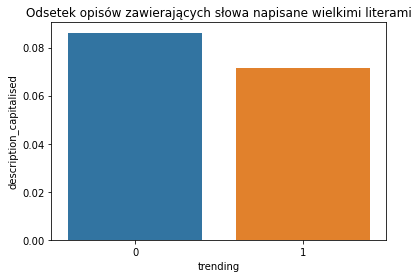

In [30]:
plt.title("Odsetek opisów zawierających słowa napisane wielkimi literami")
sns.barplot(x='trending', y='description_capitalised', data=grouped);

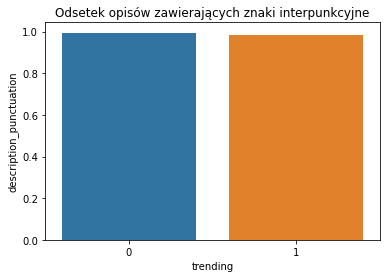

In [31]:
plt.title("Odsetek opisów zawierających znaki interpunkcyjne")
sns.barplot(x='trending', y='description_punctuation', data=grouped);

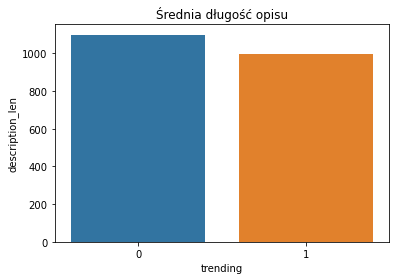

In [32]:
plt.title("Średnia długość opisu")
sns.barplot(x='trending', y='description_len', data=grouped);

In [33]:
plt.title("Średnia liczba tagów")
sns.barplot(x='trending', y='tags_len', data=grouped);

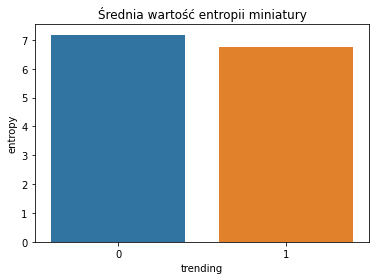

In [34]:
plt.title("Średnia wartość entropii miniatury")
sns.barplot(x='trending', y='entropy', data=grouped);

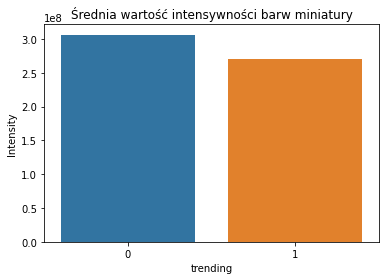

In [35]:
plt.title("Średnia wartość intensywności barw miniatury")
sns.barplot(x='trending', y='Intensity', data=grouped);

In [36]:
plt.title("Średni wiek osób wykrytych na miniaturach")
sns.barplot(x='trending', y='Age', data=grouped);

In [37]:
plt.title("Średnia ilość osób wykrytych na miniaturach")
sns.barplot(x='trending', y='person_count', data=grouped);

<AxesSubplot:title={'center':'Rozkład wykrytych płci'}, xlabel='trending', ylabel='count'>

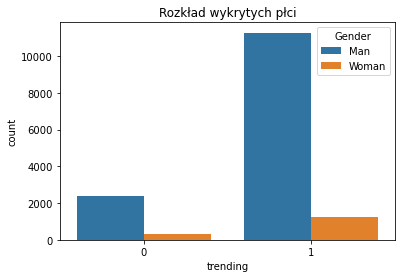

In [38]:
plt.title("Rozkład wykrytych płci")
sns.countplot(x='trending', data=df, hue="Gender") 

<AxesSubplot:title={'center':'Rozkład wykrytych ras'}, xlabel='trending', ylabel='count'>

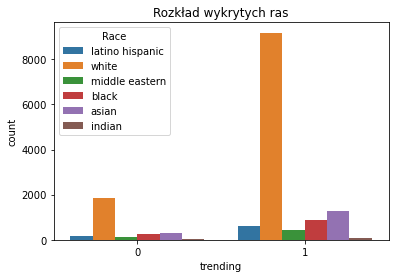

In [39]:
plt.title("Rozkład wykrytych ras")
sns.countplot(x='trending', data=df, hue="Race") 

<AxesSubplot:title={'center':'Rozkład wykrytych emocji'}, xlabel='trending', ylabel='count'>

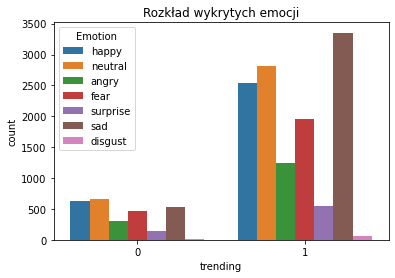

In [40]:
plt.title("Rozkład wykrytych emocji")
sns.countplot(x='trending', data=df, hue="Emotion") 

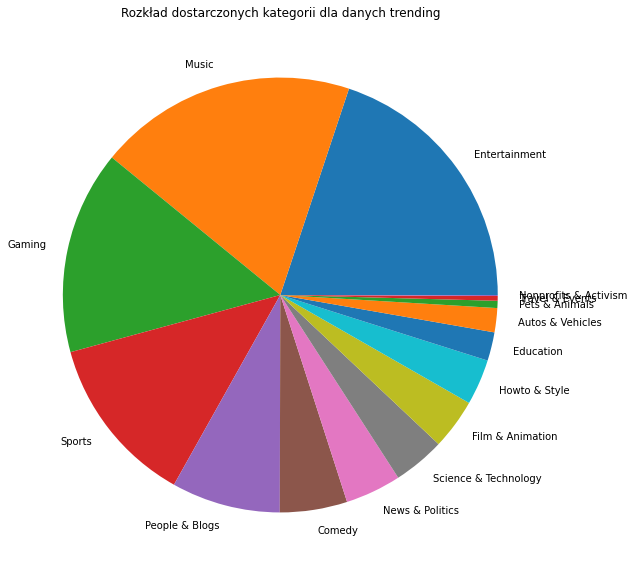

Procentowo: 
Entertainment            0.20
Music                    0.19
Gaming                   0.15
Sports                   0.13
People & Blogs           0.08
Comedy                   0.05
News & Politics          0.04
Science & Technology     0.04
Film & Animation         0.04
Howto & Style            0.03
Education                0.02
Autos & Vehicles         0.02
Pets & Animals           0.01
Travel & Events          0.00
Nonprofits & Activism    0.00
Name: cat_name, dtype: float64


In [41]:
cat_amount=df[df['trending']==1]['cat_name'].value_counts()
plt.figure(figsize=(10, 10))
plt.title("Rozkład dostarczonych kategorii dla danych trending")
plt.pie(cat_amount, labels = cat_amount.index)
plt.show()
print('Procentowo: ')
print(round(cat_amount/sum(cat_amount), 2))

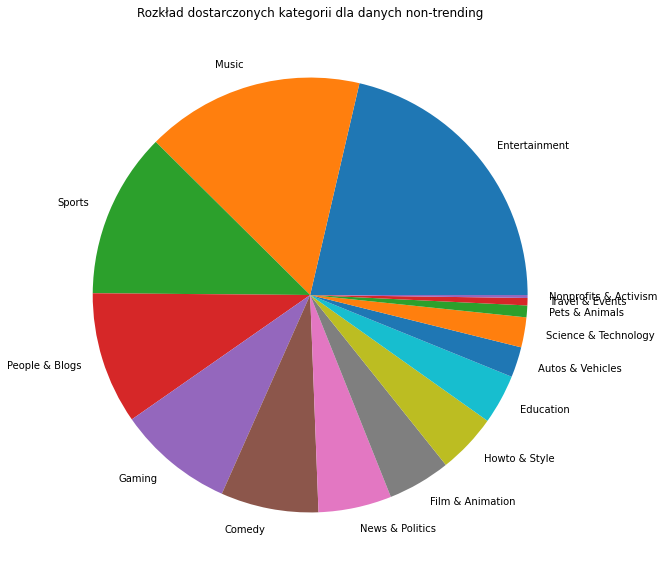

Procentowo: 
Entertainment            0.21
Music                    0.16
Sports                   0.12
People & Blogs           0.10
Gaming                   0.09
Comedy                   0.07
News & Politics          0.05
Film & Animation         0.05
Howto & Style            0.04
Education                0.04
Autos & Vehicles         0.02
Science & Technology     0.02
Pets & Animals           0.01
Travel & Events          0.01
Nonprofits & Activism    0.00
Name: cat_name, dtype: float64
None


In [42]:
cat_amount=df[df['trending']==0]['cat_name'].value_counts()
plt.figure(figsize=(10, 10))
plt.title("Rozkład dostarczonych kategorii dla danych non-trending")
plt.pie(cat_amount, labels = cat_amount.index)
plt.show()
print('Procentowo: ')
print(print(round(cat_amount/sum(cat_amount), 2)))

In [3]:
#one hot encoding dla cech kategorycznych
df_emotions = pd.get_dummies(df.Emotion, prefix="Emotion")
df_gender = pd.get_dummies(df.Gender, prefix="Gender")
df_race = pd.get_dummies(df.Race, prefix="Race")

df = pd.concat([df, df_emotions, df_gender, df_race], axis=1)
df = df.drop(['Emotion', "Gender", "Race"], axis=1)
df["title_capitalised"] = df["title_capitalised"].astype(int)
df["title_punctuation"] = df["title_punctuation"].astype(int)
df["description_capitalised"] = df["description_capitalised"].astype(int)
df["description_punctuation"] = df["description_punctuation"].astype(int)

In [4]:
df

publishedAt_hour  title_len  title_capitalised  title_punctuation  \
0                    19         34                  1                  1   
1                    17         60                  0                  1   
2                    16         53                  0                  1   
3                    16         56                  0                  1   
4                    15         55                  0                  1   
...                 ...        ...                ...                ...   
15234                21         98                  0                  1   
15235                15         56                  0                  0   
15236                15         24                  0                  1   
15237                23         47                  0                  1   
15238                17         38                  0                  1   

       description_capitalised  description_punctuation  description_len  \
0                            0                        1              362   
1                            0                        1              716   
2                            0                        1              514   
3                            0                        1              763   
4                            0                        1             2494   
...                        ...                      ...              ...   
15234                        0                        1              951   
15235                        0                        1              637   
15236                        0                        1              761   
15237                        0                        1             4833   
15238                        0                        1             1880   

                                           filtered_tags  tags_len   entropy  \
0      {'prank', 'funny', 'brother', 'mama', 'ghost',...        18  7.443330   
1      {'fun', 'titanfall', 'origin', 'royale', 'mult...        27  7.166094   
2      {'compilation', 'dank', 'fan', 'memes', 'jacks...        23  7.878431   
3      {'rapper', 'hip', 'keem', 'xxl', 'rap', 'wave'...        28  7.791861   
4      {'movie', 'theater', 'savannah', 'makeover', '...        38  7.863433   
...                                                  ...       ...       ...   
15234  {'godzilla', 'warzone', 'deaths', 'mason', 'he...        27  7.532280   
15235  {'law', 'lottery', 'math', 'sweepstakes', 'hal...        12  7.093016   
15236  {'halloween', 'twilight', 'vampires', 'voltair...         6  4.966746   
15237  {'gunna', 'fox', 'keed', 'lil', 'official', 'v...         6  6.415627   
15238  {'gq', 'gadgets', 'breaks', 'favorite', 'top',...        23  7.778232   

       ...  Emotion_sad Emotion_surprise  Gender_Man  Gender_Woman  \
0      ...            0                0           1             0   
1      ...            0                0           1             0   
2      ...            0                0           1             0   
3      ...            0                0           1             0   
4      ...            0                0           1             0   
...    ...          ...              ...         ...           ...   
15234  ...            0                0           1             0   
15235  ...            1                0           1             0   
15236  ...            0                0           1             0   
15237  ...            0                0           1             0   
15238  ...            0                0           1             0   

       Race_asian Race_black  Race_indian  Race_latino hispanic  \
0               0          0            0                     1   
1               0          0            0                     0   
2               0          0            0                     0   
3               0          1            0                     0   
4               0          0            0   

In [5]:
#Skalowanie cech
scaler = MinMaxScaler()
df[['publishedAt_hour', 'title_len', 'description_len', 'tags_len', 'Intensity', 'person_count']] = scaler.fit_transform(df[['publishedAt_hour', 'title_len', 'description_len', 'tags_len', 'Intensity', 'person_count']])

In [6]:
df = df.drop(['filtered_tags', 'objects'], axis=1)

In [7]:
df

publishedAt_hour  title_len  title_capitalised  title_punctuation  \
0              0.826087   0.319588                  1                  1   
1              0.739130   0.587629                  0                  1   
2              0.695652   0.515464                  0                  1   
3              0.695652   0.546392                  0                  1   
4              0.652174   0.536082                  0                  1   
...                 ...        ...                ...                ...   
15234          0.913043   0.979381                  0                  1   
15235          0.652174   0.546392                  0                  0   
15236          0.652174   0.216495                  0                  1   
15237          1.000000   0.453608                  0                  1   
15238          0.739130   0.360825                  0                  1   

       description_capitalised  description_punctuation  description_len  \
0                            0                        1         0.072414   
1                            0                        1         0.143229   
2                            0                        1         0.102821   
3                            0                        1         0.152631   
4                            0                        1         0.498900   
...                        ...                      ...              ...   
15234                        0                        1         0.190238   
15235                        0                        1         0.127425   
15236                        0                        1         0.152230   
15237                        0                        1         0.966793   
15238                        0                        1         0.376075   

       tags_len   entropy  Intensity  ...  Emotion_sad  Emotion_surprise  \
0      0.250000  7.443330   0.735234  ...            0                 0   
1      0.375000  7.166094   0.288100  ...            0                 0   
2      0.319444  7.878431   0.438999  ...            0                 0   
3      0.388889  7.791861   0.504492  ...            0                 0   
4      0.527778  7.863433   0.521466  ...            0                 0   
...         ...       ...        ...  ...          ...               ...   
15234  0.375000  7.532280   0.358829  ...            0                 0   
15235  0.166667  7.093016   0.389377  ...            1                 0   
15236  0.083333  4.966746   0.202351  ...            0                 0   
15237  0.083333  6.415627   0.306662  ...            0                 0   
15238  0.319444  7.778232   0.565335  ...            0                 0   

       Gender_Man Gender_Woman  Race_asian  Race_black  Race_indian  \
0               1            0           0           0            0   
1               1            0           0           0            0   
2               1            0           0           0            0   
3               1            0           0           1            0   
4               1            0           0           0            0   
...           ...          ...         ...         ...          ...   
15234           1            0           0           1            0   
15235           1            0           0           0            0   
15236           1            0           0           0            0   
15237           1            0           0           0            0   
15238           1            0           0           0            0   

       Race_latino hispanic  Race_middle eastern  Race_white  
0                         1                    0           0  
1                         0                    0           1  
2                         0                    1           0  
3                         0                    0           0  
4                         0                    0           1  
...                     ...          

In [3]:
#df.to_csv('df.csv', index=False)
#df = pd.read_csv('df.csv')

<font size="5"><b>Przygotowanie danych do treningu</b></font>

<font size="3"><b>Dane niezbalansowane</b></font>

In [4]:
#wymieszanie danych
df = shuffle(df)
df

publishedAt_hour  title_len  title_capitalised  title_punctuation  \
11854          0.173913   0.381443                  0                  1   
3670           0.956522   0.793814                  0                  1   
14703          0.869565   0.402062                  0                  1   
1047           0.608696   0.979381                  0                  1   
1806           0.956522   0.525773                  0                  1   
...                 ...        ...                ...                ...   
8144           0.913043   0.288660                  0                  1   
11144          0.913043   0.268041                  0                  1   
14185          0.565217   0.907216                  0                  1   
10137          0.173913   0.865979                  0                  1   
5468           0.173913   0.938144                  0                  1   

       description_capitalised  description_punctuation  description_len  \
11854                        1                        1         0.464093   
3670                         0                        1         0.112623   
14703                        0                        1         0.090618   
1047                         0                        1         0.166633   
1806                         0                        1         0.134427   
...                        ...                      ...              ...   
8144                         0                        1         0.003201   
11144                        0                        1         0.068414   
14185                        0                        1         0.975795   
10137                        1                        1         0.232647   
5468                         0                        1         0.128026   

       tags_len   entropy  Intensity  ...  Emotion_sad  Emotion_surprise  \
11854  0.166667  7.366912   0.431045  ...            0                 0   
3670   0.013889  7.280863   0.375360  ...            0                 0   
14703  0.180556  7.398470   0.294811  ...            0                 0   
1047   0.305556  7.583700   0.323942  ...            0                 0   
1806   0.583333  7.609307   0.450574  ...            0                 0   
...         ...       ...        ...  ...          ...               ...   
8144   0.013889  4.142322   0.887696  ...            0                 0   
11144  0.138889  6.447065   0.432489  ...            1                 0   
14185  0.111111  7.911496   0.474067  ...            0                 0   
10137  0.041667  7.613367   0.483047  ...            0                 0   
5468   0.402778  7.517081   0.350639  ...            0                 0   

       Gender_Man Gender_Woman  Race_asian  Race_black  Race_indian  \
11854           1            0           0           0            0   
3670            1            0           0           1            0   
14703           1            0           1           0            0   
1047            1            0           1           0            0   
1806            0            1           0           0            0   
...           ...          ...         ...         ...          ...   
8144            1            0           0           0            0   
11144           1            0           0           0            0   
14185           1            0           0           0            0   
10137           1            0           0           0            0   
5468            1            0           1           0            0   

       Race_latino hispanic  Race_middle eastern  Race_white  
11854                     0                    0           1  
3670                      0                    0           0  
14703                     0                    0           0  
1047                      0                    0           0  
1806                      0                    0           1  
...                     ...          

In [5]:
#usunięcie wierszy z brakującymi danymi
df = df.dropna()
df

publishedAt_hour  title_len  title_capitalised  title_punctuation  \
11854          0.173913   0.381443                  0                  1   
3670           0.956522   0.793814                  0                  1   
14703          0.869565   0.402062                  0                  1   
1047           0.608696   0.979381                  0                  1   
1806           0.956522   0.525773                  0                  1   
...                 ...        ...                ...                ...   
8144           0.913043   0.288660                  0                  1   
11144          0.913043   0.268041                  0                  1   
14185          0.565217   0.907216                  0                  1   
10137          0.173913   0.865979                  0                  1   
5468           0.173913   0.938144                  0                  1   

       description_capitalised  description_punctuation  description_len  \
11854                        1                        1         0.464093   
3670                         0                        1         0.112623   
14703                        0                        1         0.090618   
1047                         0                        1         0.166633   
1806                         0                        1         0.134427   
...                        ...                      ...              ...   
8144                         0                        1         0.003201   
11144                        0                        1         0.068414   
14185                        0                        1         0.975795   
10137                        1                        1         0.232647   
5468                         0                        1         0.128026   

       tags_len   entropy  Intensity  ...  Emotion_sad  Emotion_surprise  \
11854  0.166667  7.366912   0.431045  ...            0                 0   
3670   0.013889  7.280863   0.375360  ...            0                 0   
14703  0.180556  7.398470   0.294811  ...            0                 0   
1047   0.305556  7.583700   0.323942  ...            0                 0   
1806   0.583333  7.609307   0.450574  ...            0                 0   
...         ...       ...        ...  ...          ...               ...   
8144   0.013889  4.142322   0.887696  ...            0                 0   
11144  0.138889  6.447065   0.432489  ...            1                 0   
14185  0.111111  7.911496   0.474067  ...            0                 0   
10137  0.041667  7.613367   0.483047  ...            0                 0   
5468   0.402778  7.517081   0.350639  ...            0                 0   

       Gender_Man Gender_Woman  Race_asian  Race_black  Race_indian  \
11854           1            0           0           0            0   
3670            1            0           0           1            0   
14703           1            0           1           0            0   
1047            1            0           1           0            0   
1806            0            1           0           0            0   
...           ...          ...         ...         ...          ...   
8144            1            0           0           0            0   
11144           1            0           0           0            0   
14185           1            0           0           0            0   
10137           1            0           0           0            0   
5468            1            0           1           0            0   

       Race_latino hispanic  Race_middle eastern  Race_white  
11854                     0                    0           1  
3670                      0                    0           0  
14703                     0                    0           0  
1047                      0                    0           0  
1806                      0                    0           1  
...                     ...          

In [6]:
X = df.drop(['trending', 'cat_name'], axis = 1)
y = df['trending']

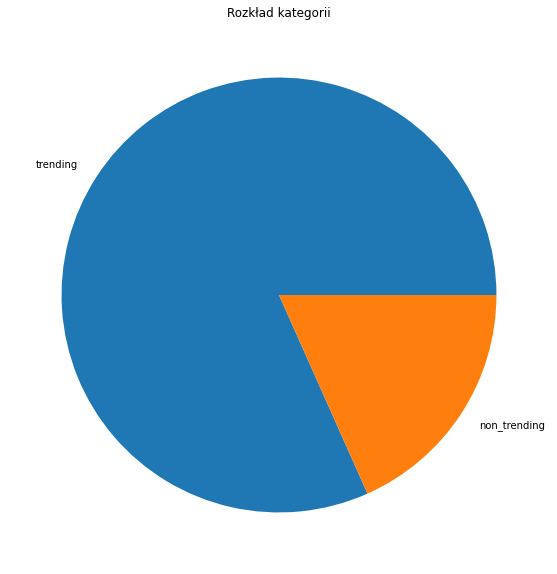

1    12204
0     2739
Name: trending, dtype: int64


In [7]:
cat_amount=y.value_counts()
plt.figure(figsize=(10, 10))
plt.title("Rozkład kategorii")
plt.pie(cat_amount, labels = ['trending', 'non_trending'])
plt.show()
print(cat_amount)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

<font size="5"><b>Trening klasyfikatorów</b></font>

In [14]:
#DesicionTree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)
gmean = geometric_mean_score(y_test, preds, average='weighted')

print("Accuracy score: ", acc_score)
print("G-mean score: ", gmean)

Accuracy score:  0.7070154095701541
G-mean score:  0.5035043823937022


In [15]:
#KNN
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
acc_score = accuracy_score(y_test, preds)
gmean = geometric_mean_score(y_test, preds, average='weighted')

print("Accuracy score: ", acc_score)
print("G-mean score: ", gmean)

Accuracy score:  0.783860502838605
G-mean score:  0.4205978015432322


<font size="3"><b>Wyrównanie danych przy użyciu SMOTE'a</b></font>

In [9]:
oversample = SMOTE()

In [10]:
X_over, y_over = oversample.fit_resample(X, y)

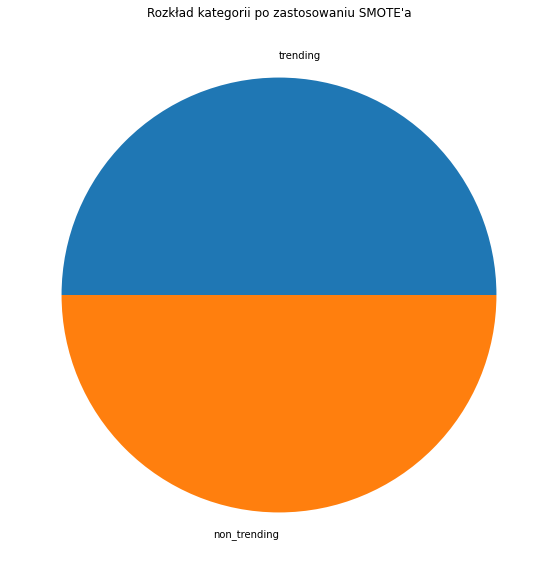

1    12204
0    12204
Name: trending, dtype: int64


In [11]:
cat_amount=y_over.value_counts()
plt.figure(figsize=(10, 10))
plt.title("Rozkład kategorii po zastosowaniu SMOTE'a")
plt.pie(cat_amount, labels = ['trending', 'non_trending'])
plt.show()
print(cat_amount)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size=0.2, random_state=42)

<font size="5"><b>Trening klasyfikatorów</b></font>

In [21]:
#desicion tree
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)
gmean = geometric_mean_score(y_test, preds, average='weighted')

print("Accuracy score: ", acc_score)
print("G-mean score: ", gmean)

Accuracy score:  0.7902498975829578
G-mean score:  0.7903072598269276


In [38]:
#KNN
neigh = KNeighborsClassifier()
neigh.fit(X_train, y_train)
preds = neigh.predict(X_test)
acc_score = accuracy_score(y_test, preds)
gmean = geometric_mean_score(y_test, preds, average='weighted')

print("Accuracy score: ", acc_score)
print("G-mean score: ", gmean)

Accuracy score:  0.746005735354363
G-mean score:  0.7468208573345546


<font size="3"><b>Dostrojenie parametrów dla drzewa decyzyjnego</b></font>

In [33]:
#dostrojenie parametrów dla DesicionTree
criterion = ['gini', 'entropy']
max_depth = list(range(22,33,2))
#min_samples_split= [2,3,4,5]
max_leaf_nodes= list(range(50,130,10))

params = {'criterion':criterion,
         'max_depth':max_depth,
         #'min_samples_split':min_samples_split,
         'max_leaf_nodes':max_leaf_nodes}


In [34]:
clf_gs = GridSearchCV(clf, params)
clf_gs.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=22,
                                              max_leaf_nodes=90,
                                              random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [22, 24, 26, 28, 30, 32],
                         'max_leaf_nodes': [50, 60, 70, 80, 90, 100, 110, 120]})

In [35]:
clf_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=28, max_leaf_nodes=110,
                       random_state=0)

In [31]:
clf_gs.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=22, max_leaf_nodes=90,
                       random_state=0)

In [26]:
clf_gs.best_estimator_

DecisionTreeClassifier(max_depth=12, max_leaf_nodes=70, random_state=0)

<font size="3"><b>Najwyższy uzyskany wynik</b></font>

In [13]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=28, max_leaf_nodes=110, random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)
gmean = geometric_mean_score(y_test, preds, average='weighted')

print("Accuracy score: ", acc_score)
print("G-mean score: ", gmean)

Accuracy score:  0.8099139696845555
G-mean score:  0.8101590041344509


In [17]:
fig = plt.figure(figsize=(250,200))
_ = tree.plot_tree(clf, feature_names = X.columns, class_names=['non-trending', 'trending'])

In [18]:
fig.savefig("decision_tree.png")

Ostatecznym klasyfikatorem jest Drzewo decyzyjne z dobranymi przy pomocy GridSearch parametrami, nauczonym na podstawie zbalansowanych danych (przy użyciu techniki SMOTE). Uzyskał on najwyższe wyniki. Jeżeli chodzi o wiedzę dla Youtubera, to ciężko w tym przypadku jednocześnie wskazać. Zbiór danych non-trending został stworzony o filmy równie popularne, które jednak do listy trending nie trafiły. Musiały tam zaważyć szczegóły i ciężko w tym przypadku o jasno widoczne wnioski (jak w przypadku zupełnie mniej popularnych filmów, które przykładowo posiadają "nudne"/mało kolorowe miniatury, krótkie opisy itp.)
W tym przypadku wszystkie filmy to "wyższa" półka Youtubowa, która posiada dobrze przygotowane miniatury i opisy (co można zauważyć przy analizie danych, które to prawie się nie różnią pomiędzy danymi trending/non-trending). 
Można posłużyć się wizualizacją drzewa decyzyjnego, które to jest bardzo szczegółowe (przez to trochę ciężkie w analizie). 
Przyszły Youtuber jednak, może prześledzić jego poszczególne gałęzie, aby wiedzieć którą ścieżkę obierać. 

<b>DOdatkowe poprawki</b>

In [14]:
#możliwy podgląd "ważnych" dla klasyfikatora cech
pd.DataFrame({'Variable':X.columns,
              'Importance':clf.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
11             person_count    0.689058
7                  tags_len    0.157413
12               categoryId    0.040044
0          publishedAt_hour    0.036281
9                 Intensity    0.030426
1                 title_len    0.010305
6           description_len    0.009888
8                   entropy    0.007433
10                      Age    0.005992
3         title_punctuation    0.003135
15             Emotion_fear    0.001655
4   description_capitalised    0.001604
22               Race_asian    0.001296
16            Emotion_happy    0.001257
2         title_capitalised    0.001247
27               Race_white    0.001034
17          Emotion_neutral    0.000986
13            Emotion_angry    0.000946
18              Emotion_sad    0.000000
19         Emotion_surprise    0.000000
20               Gender_Man    0.000000
21             Gender_Woman    0.000000
5   description_punctuation    0.000000
23               Race_black    0.000000
24              Race_indian    0.000000
25     Race_latino hispanic    0.000000
26      Race_middle eastern    0.000000
14          Emotion_disgust    0.000000

In [16]:
#Test na oryginalnych danych; wcześniejsza ocena została wykonana na danych zbalansowanych. 

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [17]:
clf = DecisionTreeClassifier(criterion = 'entropy', max_depth=28, max_leaf_nodes=110, random_state=0)
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc_score = accuracy_score(y_test, preds)
gmean = geometric_mean_score(y_test, preds, average='weighted')

print("Accuracy score: ", acc_score)
print("G-mean score: ", gmean)

Accuracy score:  0.8025141930251419
G-mean score:  0.4148239510792712


In [18]:
pd.DataFrame({'Variable':X.columns,
              'Importance':clf.feature_importances_}).sort_values('Importance', ascending=False)

Variable  Importance
7                  tags_len    0.289871
9                 Intensity    0.189606
12               categoryId    0.111177
6           description_len    0.105335
8                   entropy    0.074223
1                 title_len    0.072190
11             person_count    0.053307
0          publishedAt_hour    0.034910
10                      Age    0.023137
17          Emotion_neutral    0.014326
26      Race_middle eastern    0.008001
16            Emotion_happy    0.007499
15             Emotion_fear    0.004367
27               Race_white    0.004142
20               Gender_Man    0.004009
4   description_capitalised    0.003899
13            Emotion_angry    0.000000
5   description_punctuation    0.000000
3         title_punctuation    0.000000
18              Emotion_sad    0.000000
19         Emotion_surprise    0.000000
21             Gender_Woman    0.000000
22               Race_asian    0.000000
23               Race_black    0.000000
24              Race_indian    0.000000
25     Race_latino hispanic    0.000000
2         title_capitalised    0.000000
14          Emotion_disgust    0.000000